# Task

Use the ADA [competition case](https://www.kaggle.com/competitions/ecom-90025-2025-sm-2-ada-assignment-and-practice/overview) or [here](https://www.kaggle.com/t/f5f7783abf31495f9593b3d93a18f9eb) if the first fails.

1. Read the training sample to a Pandas dataframe.
1. Report the correlations of explanatory variables with the dependent variable $y$.
1. Choose one explanatory variable, denoted by $x$, and estimate a simple linear model
$$y=\beta_0+\beta_1x + \epsilon$$
1. Use the estimtes of $\beta_0$ and $\beta_1$ and the testing sample to predict $y$.
1. Submit your prediction file and get your Kaggle score screenshot.
1. Show your screenshot in the PDF file. Circle your **group name** in the screenshot.


# ADA Group 9 - Assignment 1

Install the necessary packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

Reading the training sample to a Pandas dataframe

In [4]:
df = pd.read_csv(r'c:\Users\footy\OneDrive\Desktop\University\Semester 2 - 2025\Advanced Data Analysis\Data\train_data.csv')
df

,ID,Y,X1,X2,X3,X4,X5,X6,X7,X8,...,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50
0,0,-1.399091,1.174139,1.413109,0.164693,-1.067338,0.015324,-1.280970,0.489681,-0.371982,...,-0.115044,-2.580043,-0.812428,0.772820,-0.460444,0.190422,-0.362052,-1.119038,0.916313,-1.517434
1,1,3.097990,0.208922,0.931231,0.838779,0.893483,-0.510555,0.900289,-0.042490,0.839400,...,1.155635,0.673035,-0.438152,-0.001316,-0.761800,1.335092,0.901978,-1.549504,-0.456224,0.223405
2,2,-1.707346,-0.744982,0.962118,0.615392,-0.427943,-0.014912,1.138781,1.159491,0.055467,...,0.299277,1.387495,-0.007519,-0.464825,0.830986,0.373124,0.319232,-0.577295,-1.363846,-0.347154
3,3,0.610625,-0.170428,-1.361771,0.206042,0.623124,0.907441,-0.873814,1.287383,0.901191,...,1.209247,0.095866,-0.287905,-1.110714,-1.660352,0.207231,-0.419119,-0.517563,-1.050697,-0.096327
4,4,-0.689196,-0.858792,0.321308,-0.415649,1.014056,-0.522858,0.926634,-0.390663,0.790054,...,-1.191989,-1.127448,0.246358,0.407769,1.132454,-0.016621,0.964745,0.091532,0.649593,-0.818020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2395,2395,-5.063792,-1.500594,2.262106,-1.286958,-0.398137,-0.019257,-1.859877,0.196154,-0.123364,...,-0.238003,0.943160,1.689948,0.266216,-0.502425,1.375605,0.078639,1.164708,0.086458,0.047496
2396,2396,-3.573210,0.948172,0.808575,-0.009122,-0.276098,-1.229387,-0.986770,-0.504906,0.815537,...,-0.601955,1.157294,1.288724,-0.122133,0.615786,-0.106246,-0.253334,0.055553,-1.169629,1.321333
2397,2397,4.387664,-2.057319,0.339223,0.867412,-0.141428,0.808745,0.501565,0.253387,-0.627412,...,-1.616346,-0.859179,0.283684,0.232211,-0.459273,3.340270,-0.714544,-0.789180,-0.844288,1.042886
2398,2398,4.478714,0.561107,0.425766,-0.512064,-2.088253,-0.512058,0.286206,-0.245990,0.132967,...,-0.321989,-0.072009,0.886691,1.181095,-1.336608,-1.428349,-0.781647,1.364690,-1.627872,-0.038954


Reporting the correlations of explanatory variables with the dependent variable $y$

In [5]:
corr = df.corr(method='pearson')['Y'].drop(['Y', 'ID'])
corr_df = pd.DataFrame({'ID': corr.index, 'Correlation': corr.values})
corr_df

,ID,Correlation
0,X1,0.135257
1,X2,0.010244
2,X3,0.034430
3,X4,0.007688
4,X5,0.110160
5,X6,0.008458
6,X7,0.014777
7,X8,0.002121
8,X9,-0.022106
9,X10,0.141671


For this exercise, let us choose the variable with the strongest correlation.

In [6]:
max_corr = corr_df.loc[corr_df.Correlation == max(corr_df.Correlation)]
min_corr = corr_df.loc[corr_df.Correlation == min(corr_df.Correlation)]

print("Maximum correlation:\n", max_corr)
print("Minimum correlation:\n", min_corr)

Maximum correlation:
      ID  Correlation
33  X34     0.330143
Minimum correlation:
      ID  Correlation
27  X28    -0.033331


Let us now estimate a simple linear regression model and print out our results.

In [8]:
# Estimate a simple linear regression model

X = df[['X34']]
y = df[['Y']]
model = LinearRegression()
model.fit(X, y)

# Get the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Print the results
print('Coefficients:', coefficients)
print('Intercept:', intercept)

Coefficients: [[1.1650472]]
Intercept: [0.43622054]


Import the testing sample to see how the model performs.

In [9]:
test_df = pd.read_csv(r'c:\Users\footy\OneDrive\Desktop\University\Semester 2 - 2025\Advanced Data Analysis\Data\test_data.csv')
test_df

# Predict Y using X34 in the test set

X_34 = test_df[['X34']]
Y_pred = model.predict(X_34)

# Create the dataframe with each ID and the predicted Y value

test_df['Y_pred'] = Y_pred
pred_df = test_df[['ID', 'Y_pred']]
pred_df

,ID,Y_pred
0,2400,0.816814
1,2401,1.255178
2,2402,0.455569
3,2403,-1.719227
4,2404,1.828901
...,...,...
1595,3995,2.770799
1596,3996,0.614231
1597,3997,0.981965
1598,3998,1.086963


Exporting the prediction to a csv file for submission

In [10]:
submission_ass1 = pd.read_csv(r'c:\Users\footy\OneDrive\Desktop\University\Semester 2 - 2025\Advanced Data Analysis\Data\submission.csv')
submission_ass1['Y'] = pred_df[['Y_pred']].values
export_path = r'C:\Users\footy\OneDrive\Desktop\University\Semester 2 - 2025\Advanced Data Analysis\Assignments\A1_submission.csv'
submission_ass1.to_csv(export_path, index=False)

Screenshot of final submission for assignment 1 to Kaggle

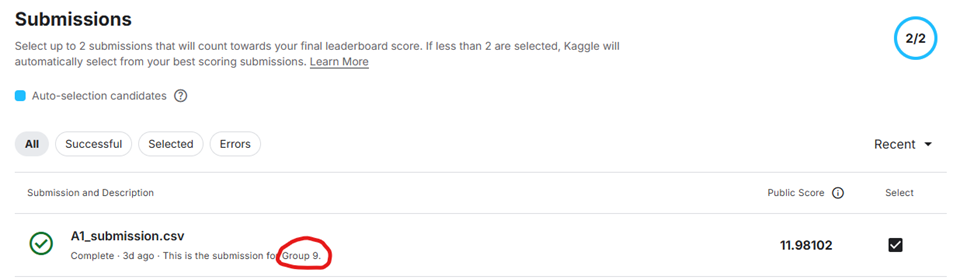